In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Explore The Data

In [50]:
path = os.getcwd()
train = pd.read_csv(path+'/data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

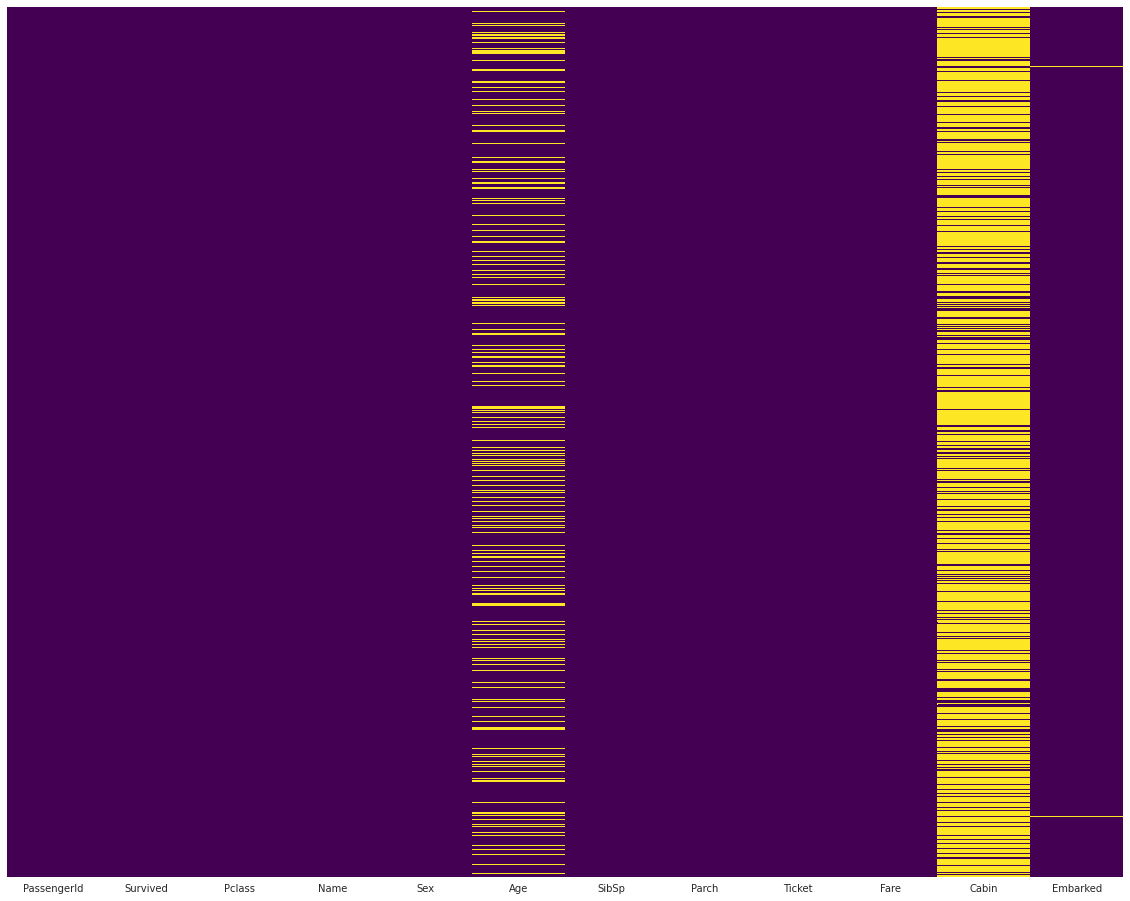

In [51]:
train.isnull() # check for missing data
plt.figure(figsize=(20,16))
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis')   # # we miss some info in 'Age', 'Embarked' and a lot more in the 'Cabin' column.

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
# seperate data into numerical and categorical

df_num= train[['Age','SibSp','Parch','Fare']]
df_str = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

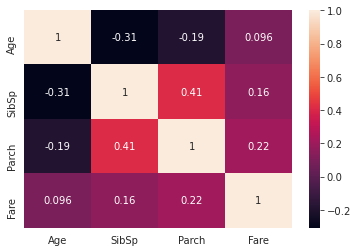

In [54]:
# look for correlations in the numerical data 

print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True)

In [55]:
# compare survival rate across Age, SibSp, Parch, and Fare 

pd.pivot_table(train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


          Ticket
Survived        
0            549
1            342


<AxesSubplot:xlabel='Survived', ylabel='count'>

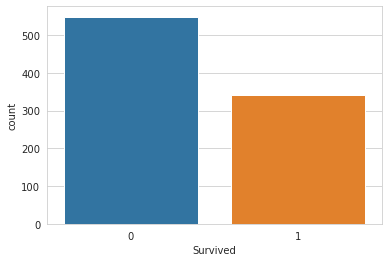

In [56]:
# lets check the number of survivors and non survivors
sns.set_style('whitegrid')
print(pd.pivot_table(train, index = 'Survived', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived') 

Sex       female  male
Survived              
0             81   468
1            233   109


<AxesSubplot:xlabel='Survived', ylabel='count'>

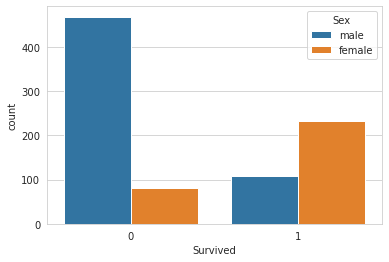

In [57]:
# lets check the number of male and female survivors and non survivors respectively 
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Sex')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


<AxesSubplot:xlabel='Survived', ylabel='count'>

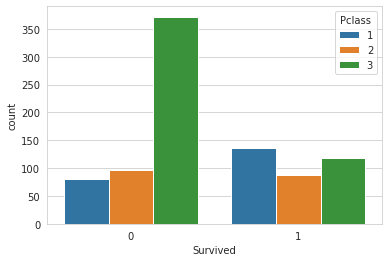

In [58]:
# lets check the number of survivors and non survivors based on their  Ticket Class 
print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Pclass') 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


<AxesSubplot:xlabel='Survived', ylabel='count'>

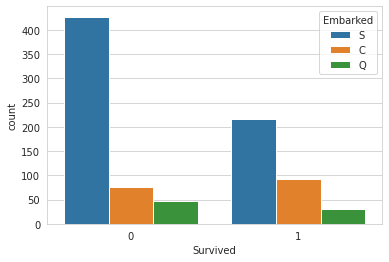

In [59]:
# lets check the number of survivors and non survivors based on their  Embarked place
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Embarked') 

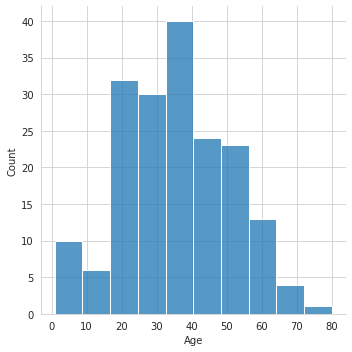

In [60]:
# lets check the Age of the passengers for whom we have info
sns.displot(data=train.dropna(), x='Age')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

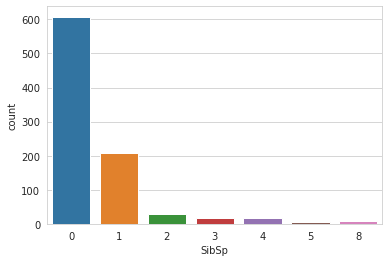

In [61]:
# lets check the number of passengers that traveled alone or with other people (siblings etc)
sns.countplot(data=train, x='SibSp')

In [62]:
SurvBySibSp=train.groupby([train['Survived'],train['SibSp']>0]).count()
SurvBySibSp

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived SibSp                                                              
0        False          398     398   398  398  296    398    398     398   
         True           151     151   151  151  128    151    151     151   
1        False          210     210   210  210  175    210    210     210   
         True           132     132   132  132  115    132    132     132   

                Fare  Cabin  Embarked  
Survived SibSp                         
0        False   398     49       398  
         True    151     19       151  
1        False   210     77       208  
         True    132     59       132

<AxesSubplot:xlabel='Survived'>

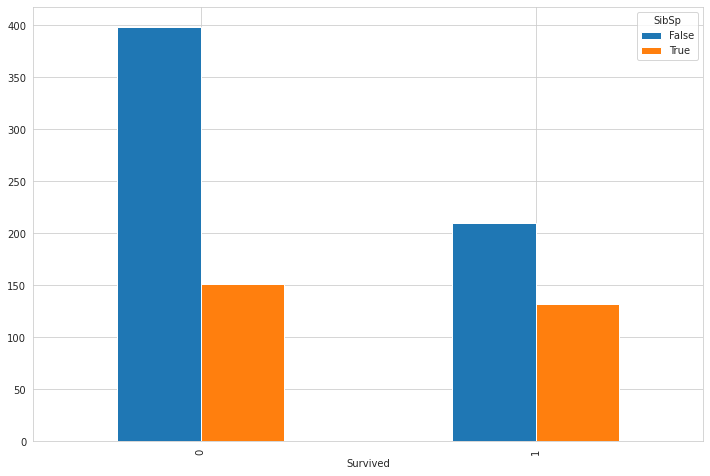

In [63]:
SurvBySibSp.unstack()['PassengerId'].plot(kind='bar',figsize=(12,8))

SibSp         0      1     2     3     4    5    8
Survived                                          
0         398.0   97.0  15.0  12.0  15.0  5.0  7.0
1         210.0  112.0  13.0   4.0   3.0  NaN  NaN


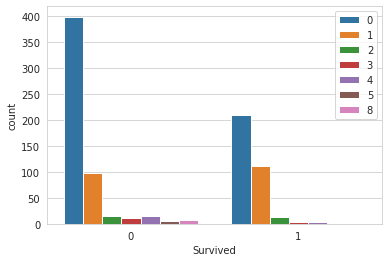

In [64]:
print(pd.pivot_table(train, index = 'Survived', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived', hue='SibSp')
plt.legend(loc='upper right')

<AxesSubplot:xlabel='Parch', ylabel='count'>

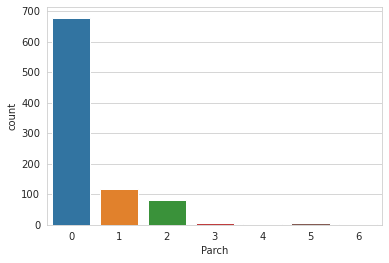

In [65]:
# lets check the number of passengers that traveled alone or with other people (parents etc)
sns.countplot(data=train, x='Parch')

In [66]:
SurvByParch=train.groupby([train['Survived'],train['Parch']>0]).count()
SurvByParch

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  \
Survived Parch                                                              
0        False          445     445   445  445  335    445    445     445   
         True           104     104   104  104   89    104    104     104   
1        False          233     233   233  233  186    233    233     233   
         True           109     109   109  109  104    109    109     109   

                Fare  Cabin  Embarked  
Survived Parch                         
0        False   445     50       445  
         True    104     18       104  
1        False   233     91       231  
         True    109     45       109

<AxesSubplot:xlabel='Survived'>

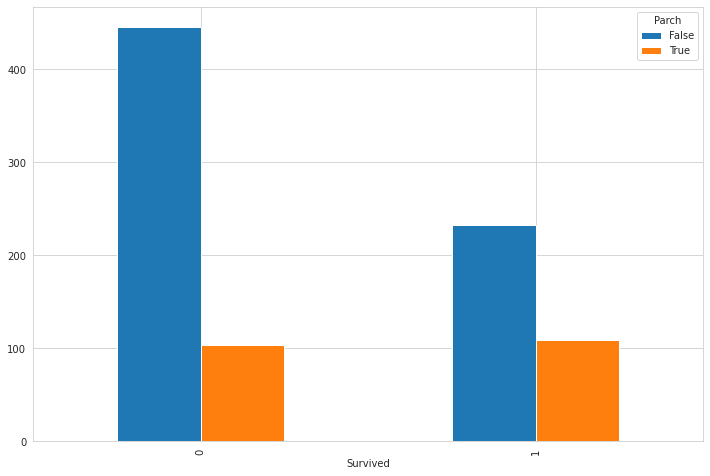

In [67]:
SurvByParch.unstack()['PassengerId'].plot(kind='bar',figsize=(12,8))

Parch         0     1     2    3    4    5    6
Survived                                       
0         445.0  53.0  40.0  2.0  4.0  4.0  1.0
1         233.0  65.0  40.0  3.0  NaN  1.0  NaN


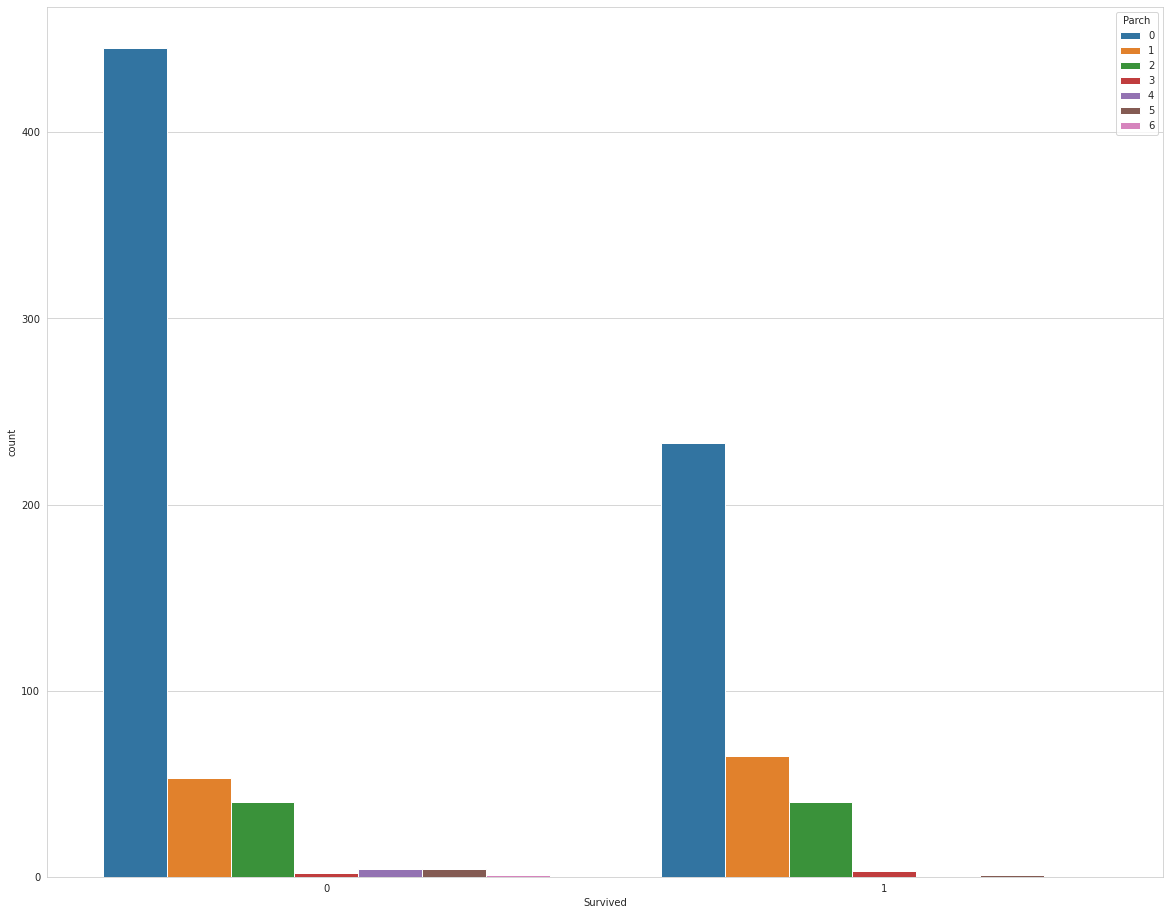

In [68]:
plt.figure(figsize=(20,16))
sns.countplot(data=train, x='Survived', hue='Parch')
print(pd.pivot_table(train, index = 'Survived', columns = 'Parch', values = 'Ticket' ,aggfunc ='count'))

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: Fare, Length: 248, dtype: int64


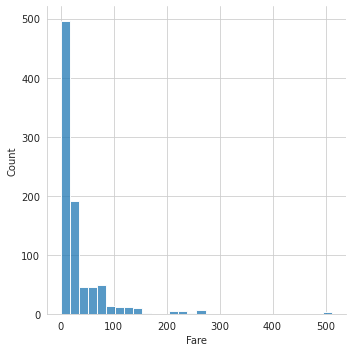

In [69]:
# lets check thow much people paid

print(train['Fare'].value_counts())
sns.displot(data=train, x='Fare', bins=30)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

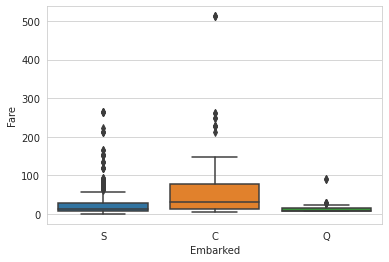

In [70]:
# let see what people paid (avarage) based on the place where they embarked the ship
sns.boxplot(x='Embarked', y='Fare', data=train)

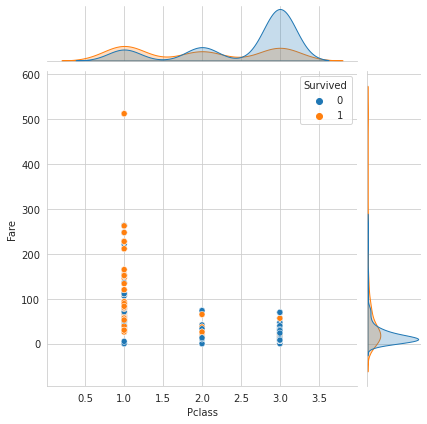

In [71]:
sns.jointplot(data=train,x='Pclass',y='Fare',hue='Survived')

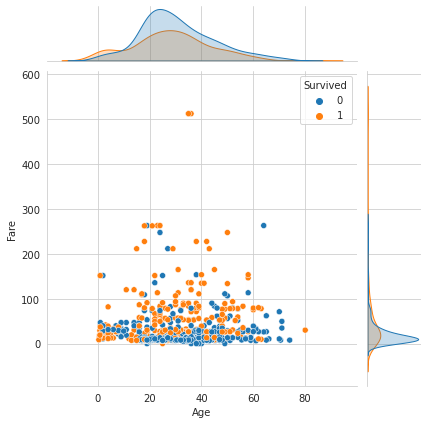

In [72]:
sns.jointplot(data=train,x='Age',y='Fare',hue='Survived')

In [73]:
train['Ticket'].value_counts()

CA. 2343     7
1601         7
347082       7
347088       6
3101295      6
            ..
349242       1
2647         1
19972        1
PC 17596     1
A/5 21172    1
Name: Ticket, Length: 681, dtype: int64

Numeric_Tickets  False  True 
Survived                     
0                  142    407
1                   88    254


<AxesSubplot:xlabel='Survived', ylabel='count'>

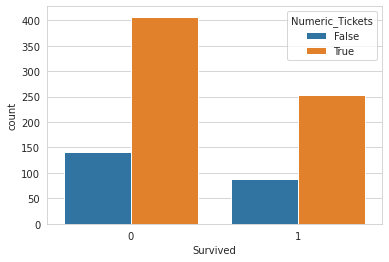

In [74]:
# Some tickets have only numbers, while other tickets contain also letters. Lets try to find motifs based on theat difference
train['Numeric_Tickets'] = train['Ticket'].apply(lambda x: True if x[0].isnumeric()==True else False)

# lets check the number of survivors and non survivors
print(pd.pivot_table(train, index = 'Survived', columns = 'Numeric_Tickets', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'Numeric_Tickets') 

**It does not seem to be any difference between tickets where the first character is a number or not, but we can can explore if there is 
something interesting depending on the specific number or the specific letter**

In [75]:
# Maybe the first letter/number of the Ticket can give us some info

first_num = []
first_letter = []
first_num_2 = []
for i in train['Ticket'].values:
    if i[0].isnumeric(): 
        first_num.append(i[0])
    else: 
        first_letter.append(i[0])
        first_num_2.append(i.split()[-1][0])

In [76]:
print(np.unique(first_num,return_counts=True))
print(np.unique(first_letter,return_counts=True))

train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0])

(array(['1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1'), array([146, 183, 301,  10,   3,   6,   9,   2,   1]))
(array(['A', 'C', 'F', 'L', 'P', 'S', 'W'], dtype='<U1'), array([29, 47,  7,  4, 65, 65, 13]))


Ticket_first_char     1     2      3    4    5    6    7    8    9
Survived                                                          
0                  54.0  98.0  229.0  8.0  3.0  5.0  8.0  2.0  NaN
1                  92.0  85.0   72.0  2.0  NaN  1.0  1.0  NaN  1.0


<AxesSubplot:xlabel='Survived', ylabel='count'>

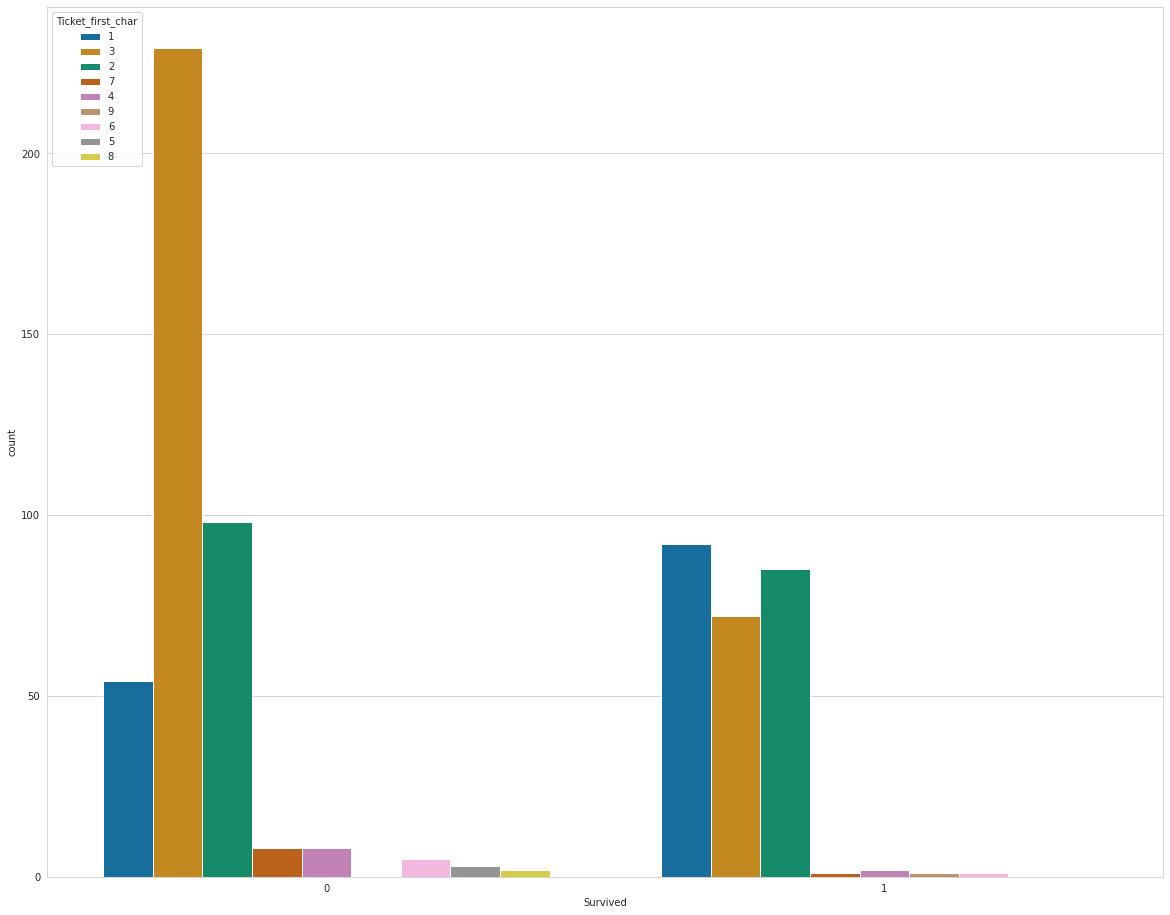

In [77]:
numeric = train[train['Ticket'].apply(lambda x: x[0].isnumeric())]
print(pd.pivot_table(numeric, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(20,16))
sns.countplot(data=numeric, x='Survived',hue = 'Ticket_first_char',palette='colorblind') 

**We can clearly see some patterns here eg people where the first number on their ticket was 1 where more likely to survive
than people where the first number on their ticket was 3. Maybe the first number indicates the position of the passenger on the ship etc.**

Ticket_first_char   A   C  F  L   P   S   W
Survived                                   
0                  27  31  3  3  23  44  11
1                   2  16  4  1  42  21   2


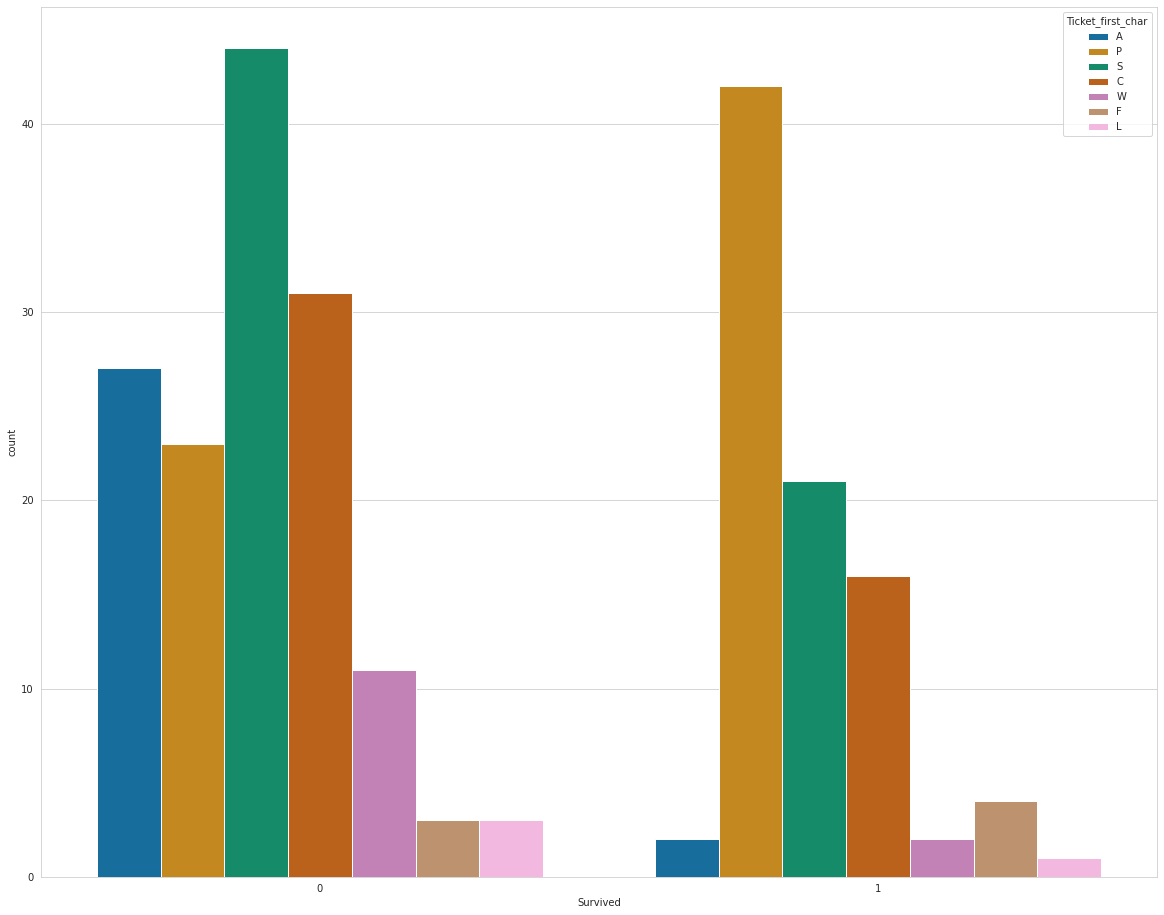

In [78]:
letter = train[train['Ticket'].apply(lambda x: x[0].isnumeric())== False]
print(pd.pivot_table(letter, index = 'Survived', columns = 'Ticket_first_char', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(20,16))
sns.countplot(data=letter, x='Survived',hue = 'Ticket_first_char',palette='colorblind') 
plt.show()

**We can clearly see some patterns here eg people where the first letter on their ticket was P where more likely to survive
than people where the first letter on their ticket was A. It is also interesting to notice that most people where the first 
letter on their ticket was P had also number 1 as the first number on the numerical part of the ticket name. On the other hand
most people where the first letter on their ticket was A had not  number 1 as the first number on the numerical part of the ticket name.
Maybe the letter is associated just with a cabin, while the first number still indicates the position of the passenger on the ship, thus we gonna
use this numbers to our model.**

In [79]:
train['Ticket_first_char'] = train['Ticket'].apply(lambda x: x[0] if x[0].isnumeric() else x.split()[-1][0])

# four passengers did not paid a fare and their ticket says 'LINE', we decide to give them 0
train['Ticket_first_char'] = train['Ticket_first_char'].apply(lambda x: '0' if x=='L' else x) 

## Feature engineering

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

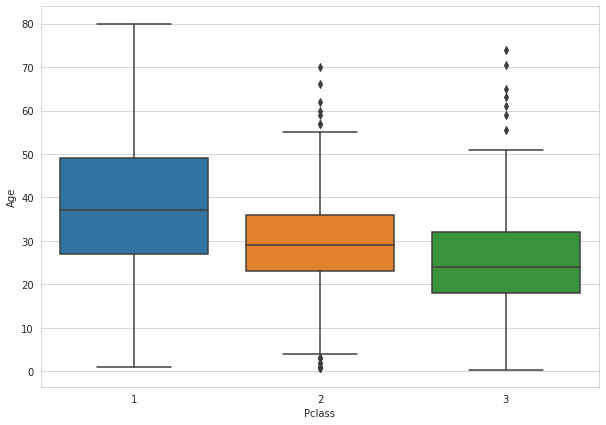

In [80]:
# We miss some data associated with the Age of some passengers, we will try to impute that missing data based on a reasonable guess

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [81]:
def impute_age(cols):
    '''
    It seems like a good approach to impute the Age based on the passenger class. For example older people may had more time to accumulate wealth and 
    be in the first class etc.
    '''
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

def AgeGroup(age):
    '''
    We decide to seperate the passengers into 4 Age Groups
    '''
    if age <= 10:
        return 'Kid'
    elif age <= 20:
        return 'Adolescent'
    elif age <= 50:
        return 'Adult'
    else:
        return 'Old'

<AxesSubplot:>

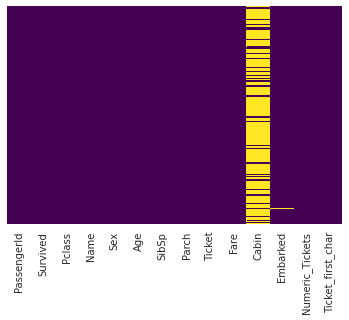

In [82]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)  # filled 'Age' column with reasonable guesses
sns.heatmap(train.isnull(), yticklabels=False, cbar= False, cmap='viridis') # filled 'Age' column with reasonable guesses


AgeGroup  Adolescent  Adult  Kid  Old
Survived                             
0                 71    410   26   42
1                 44    238   38   22


<AxesSubplot:xlabel='Survived', ylabel='count'>

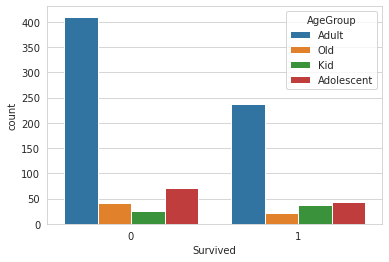

In [83]:
train['AgeGroup'] = train['Age'].apply(AgeGroup)

# lets check the number of survivors and non survivors based on their  AgeGroup 
print(pd.pivot_table(train, index = 'Survived', columns = 'AgeGroup', values = 'Ticket' ,aggfunc ='count'))
sns.countplot(data=train, x='Survived',hue = 'AgeGroup') 

In [84]:
# We miss some data associated with the Embarked place of some passengers, we will try to impute that missing data based on a reasonable guess 
train[train['Embarked'].isnull()]  # both of them were in the 1st class and their Fare prices were both 80

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Numeric_Tickets,Ticket_first_char,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,True,1,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,True,1,Old


In [85]:
#Then, show the table of median Fare values sliced by Pclass and Embarked again:
train.groupby([train['Pclass'],train['Embarked']]).median()

PassengerId  Survived   Age  SibSp  Parch     Fare  \
Pclass Embarked                                                       
1      C               453.0       1.0  38.0    0.0    0.0  78.2667   
       Q               329.5       0.5  38.5    1.5    0.0  90.0000   
       S               493.0       1.0  38.0    0.0    0.0  52.0000   
2      C               390.0       1.0  27.0    1.0    0.0  24.0000   
       Q               323.0       1.0  30.0    0.0    0.0  12.3500   
       S               439.0       0.0  30.0    0.0    0.0  13.5000   
3      C               483.0       0.0  25.0    0.0    0.0   7.8958   
       Q               400.5       0.0  25.0    0.0    0.0   7.7500   
       S               432.0       0.0  25.0    0.0    0.0   8.0500   

                 Numeric_Tickets  
Pclass Embarked                   
1      C                   False  
       Q                    True  
       S                    True  
2      C                   False  
       Q                    True  
       S                    True  
3      C                    True  
       Q                    True  
       S                    True

In [86]:
# Based on the Pclass and the Sex we impute 'Embarked' with reasonable guesses
train.loc[61, 'Embarked'] = 'C'
train.loc[829, 'Embarked'] = 'C'

**Based on the result, the median Fare price of passengers Embarked on C and were in the 1st class is 76.7, which is quite similar to 80. Therefore, it’s safe to fill in the missing value of Embarked information as “C”**

In [87]:
# We decide to drop the Cabin column due to the fact that we miss the biggest part of the data 
train.drop('Cabin', axis=1, inplace=True)

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 Sir               1
 Jonkheer          1
 Lady              1
 the Countess      1
 Don               1
 Mme               1
 Ms                1
 Capt              1
Name: Salutation, dtype: int64


<AxesSubplot:>

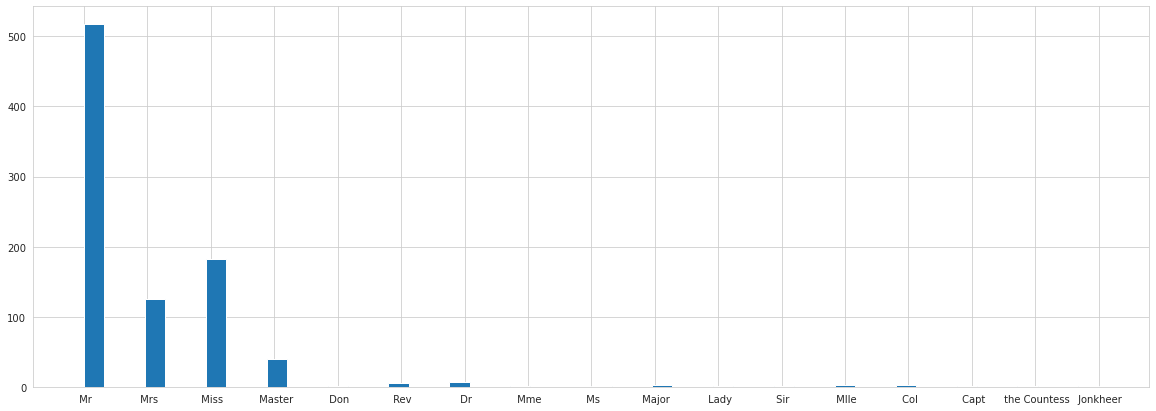

In [88]:
# It is interesting to to use the Name column and try to find some info eg based on the titles prefixing a person's name
train["Salutation"] = train['Name'].apply(lambda x: x.strip().split('.'))
train["Salutation"] = train["Salutation"].apply(lambda x: x[0].split(','))
train["Salutation"] = train["Salutation"].apply(lambda x: x[1])
print(train["Salutation"].value_counts())
train["Salutation"].hist(figsize=(20,7),bins=50)

In [89]:
train=train[train["Salutation"].apply(lambda x: x in [' Col', ' Dr', ' Major',' Master', ' Miss',  ' Mr', ' Mrs', ' Ms', ' Rev'])]
np.unique(train["Salutation"], return_counts=True)

(array([' Col', ' Dr', ' Major', ' Master', ' Miss', ' Mr', ' Mrs', ' Ms',
        ' Rev'], dtype=object),
 array([  2,   7,   2,  40, 182, 517, 125,   1,   6]))

Salutation   Col   Dr   Major   Master   Miss     Mr   Mrs   Ms   Rev
Survived                                                             
0            1.0  4.0     1.0     17.0   55.0  436.0  26.0  NaN   6.0
1            1.0  3.0     1.0     23.0  127.0   81.0  99.0  1.0   NaN


<AxesSubplot:xlabel='Survived', ylabel='count'>

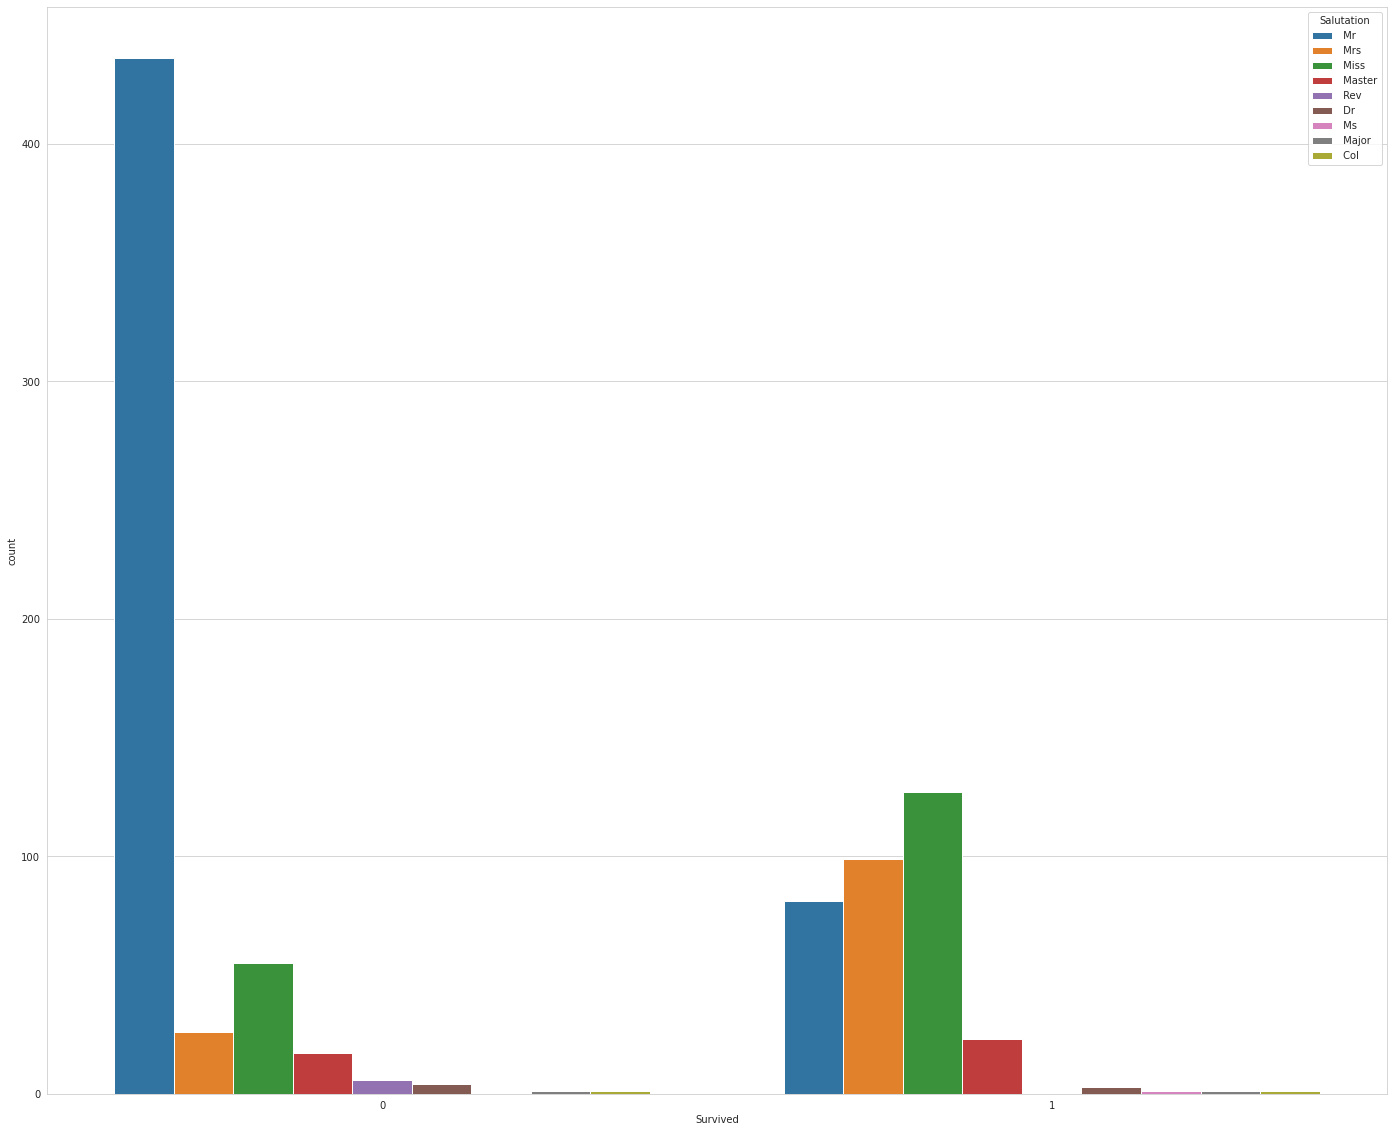

In [90]:
print(pd.pivot_table(train, index = 'Survived', columns = 'Salutation', values = 'Ticket' ,aggfunc ='count'))
plt.figure(figsize=(24,20))
sns.countplot(data=train, x='Survived', hue='Salutation')

**We can clearly see some patterns here e.g. more people with the 'Mrs' and 'Miss' prefixs survived, while more people with the prefix 'Mr' did not**

In [91]:
# create dummy variables

#ticket_first_char=pd.get_dummies(train['Ticket_first_char'],drop_first=True)

sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)
salutation = pd.get_dummies(train['Salutation'],drop_first=True)
agegroup = pd.get_dummies(train['AgeGroup'],drop_first=True)


In [92]:
train = pd.concat([train,sex,embark,salutation,agegroup], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Major,Master,Miss,Mr,Mrs,Ms,Rev,Adult,Kid,Old
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,0,1,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,0,1,0,0,0,1,0,0


In [93]:
train.drop(['PassengerId','Name','Sex','Age','AgeGroup','Ticket','Fare','Numeric_Tickets','Ticket_first_char','Embarked','Salutation'],axis=1,inplace=True)
train.head()
train.dropna()

,Survived,Pclass,SibSp,Parch,male,Q,S,Dr,Major,Master,Miss,Mr,Mrs,Ms,Rev,Adult,Kid,Old
0,0,3,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,1,3,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4,0,3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
887,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
888,0,3,1,2,0,0,1,0,0,0,1,0,0,0,0,1,0,0
889,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


## Train Test Split

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)


## Finding optimal parameters

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV

In [96]:
logmodel = LogisticRegression(max_iter = 10000)
rfc = RandomForestClassifier()
nb = GaussianNB()
sgd = SGDClassifier()

In [97]:
# GridSearch for the Random Forest Classifier model

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_
CV_rfc.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200)

In [98]:
# GridSearch for the Naive Bayes Gaussian model

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

CV_nb = GridSearchCV(estimator=nb, param_grid=param_grid)
CV_nb.fit(X_train, y_train)
CV_nb.best_params_
CV_nb.best_estimator_

GaussianNB(var_smoothing=0.03511191734215131)

In [99]:
# GridSearch for the Support Vector Machine model

param_grid = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

CV_sgd = GridSearchCV(estimator=sgd, param_grid=param_grid)
CV_sgd.fit(X_train, y_train)
CV_sgd.best_params_
CV_sgd.best_estimator_

/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/adam/anaconda3/envs/MLCourse/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

SGDClassifier(alpha=0.001, loss='log')

In [100]:
logmodel.fit(X_train.values,y_train)

LogisticRegression(max_iter=10000)

In [101]:
predictions = logmodel.predict(X_test.values)
predictions_2 = CV_rfc.predict(X_test)
predictions_3 = CV_nb.predict(X_test)
predictions_4 = CV_sgd.predict(X_test)

## Evalute my Model

In [102]:
from sklearn.metrics import classification_report, accuracy_score

In [103]:
print(classification_report(y_test,predictions))
accuracy_score(predictions, y_test)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       160
           1       0.86      0.80      0.83       105

    accuracy                           0.87       265
   macro avg       0.87      0.86      0.86       265
weighted avg       0.87      0.87      0.87       265



0.8679245283018868

In [104]:
print(classification_report(y_test,predictions_2))
accuracy_score(predictions_2, y_test)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       160
           1       0.87      0.75      0.81       105

    accuracy                           0.86       265
   macro avg       0.86      0.84      0.85       265
weighted avg       0.86      0.86      0.85       265



0.8566037735849057

In [105]:
print(classification_report(y_test,predictions_3))
accuracy_score(predictions_3, y_test)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       160
           1       0.84      0.78      0.81       105

    accuracy                           0.85       265
   macro avg       0.85      0.84      0.84       265
weighted avg       0.85      0.85      0.85       265



0.8528301886792453

In [106]:
print(classification_report(y_test,predictions_4))
accuracy_score(predictions_4, y_test)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       160
           1       0.86      0.74      0.80       105

    accuracy                           0.85       265
   macro avg       0.85      0.83      0.84       265
weighted avg       0.85      0.85      0.85       265



0.8490566037735849

**We see that the logistic regression model ends up with an accuracy around 87% slightly outperforming the other models. It is worthy to mention that we did not use the first character of the ticket in our model. By using it the logistic regression model performs poorer but other models like the SVM performs better. We also mention that by dropping outliers based on the `Salutation` column the logistic regression model improved significantly, this was somehow expected given the fact that extreme outliers may lower the performance. Finally, it is undisputed that there is more space to find different features and improve the models, e.g. the idead behind the `Ticket` may not be the best etc.**